In [2]:
#Import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
#Read data and import full file.
df = pd.read_csv('/Users/windyseng/Desktop/Project/FY17NYCSpendDataQ1-Q4.csv', header=None, low_memory=False)
df.columns = ['Quarter','Invoice Paid Date','Fiscal Year','Supplier ID','Supplier Name.Level1','Supplier Name.Level2','Commodity L1','Commodity L2','Commodity L3','PR Department','Unit of Appropriation','MA Contract Number','PR Doc ID','FMS Commodity Code','FMS Commodity Level 1','FMS Commodity Level 2','Industry','Award Doc Code Name','Budget Code Label','Fund Name','Award Number','Award Doc Identification Name','Award Doc Identification Description v','Award Details Award Method Code','Award Details Award Method Name','Award Details Contract Class Code','Award Details Contract Class Name','Award Hdr Electronic Order Type Detail','Award Hdr Original Max Contract Amount','Award Hdr Max Contract Amt','Award Doc Version No','Award Comm Line Description','Award Doc Dept Code','Award Doc Dept Name','MWBE Status','Amount in USD']
df.head()

,Quarter,Invoice Paid Date,Fiscal Year,Supplier ID,Supplier Name.Level1,Supplier Name.Level2,Commodity L1,Commodity L2,Commodity L3,PR Department,...,Award Details Contract Class Name,Award Hdr Electronic Order Type Detail,Award Hdr Original Max Contract Amount,Award Hdr Max Contract Amt,Award Doc Version No,Award Comm Line Description,Award Doc Dept Code,Award Doc Dept Name,MWBE Status,Amount in USD
0,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,396
1,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"2,835"
2,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"3,690"
3,1,7/1/16,2017,523574,GENERAL FOUNDRIES INC,GENERAL FOUNDRIES INC,Facilities,Building Materials,Construction Supplies and Materials,841-DEPARTMENT OF TRANSPORTATION,...,EXPENSE/GENERAL CONTRACT,(blank),"31,000","31,000",1,SEWER COVER,841,Department of Transportation,No,"6,200"
4,1,7/1/16,2017,624822,NU-TECH PRODUCTS INC,NU-TECH PRODUCTS INC,Facilities,MRO Supplies,Janitorial Supplies,069-DEPARTMENT OF SOCIAL SERVICES,...,EXPENSE/GENERAL CONTRACT,(blank),"1,978","1,978",1,FABRICATE AND PROVIDE PLASTIC BATHROOM PARTITIONS,69,Department of Social Services,No,"1,978"


In [14]:
#Review the number of observations in the dataset
df.count()

Quarter                                   388523
Invoice Paid Date                         388523
Fiscal Year                               388523
Supplier ID                               388523
Supplier Name.Level1                      388523
Supplier Name.Level2                      388523
Commodity L1                              388523
Commodity L2                              388523
Commodity L3                              388523
PR Department                             388523
Unit of Appropriation                     388523
MA Contract Number                        388523
PR Doc ID                                 388523
FMS Commodity Code                        388523
FMS Commodity Level 1                     388523
FMS Commodity Level 2                     388523
Industry                                  388523
Award Doc Code Name                       388523
Budget Code Label                         388523
Fund Name                                 388523
Award Number        

In [15]:
#Summary table
df.describe()

,Quarter,Fiscal Year,Award Doc Dept Code
count,388523.000000,388523.0,388523.000000
mean,2.518628,2017.0,597.439593
std,1.111302,0.0,351.293094
min,1.000000,2017.0,2.000000
25%,2.000000,2017.0,71.000000
50%,3.000000,2017.0,826.000000
75%,4.000000,2017.0,857.000000
max,4.000000,2017.0,902.000000


In [16]:
#Replace spaces and periods in the column names to make sure you can call the parameters later using replace.
df.columns = pd.Series(df.columns).str.replace(' ','_') #replaces all the spaces within the column titles
df.columns = pd.Series(df.columns).str.replace('.','_') #replaces all the periods within the column titles
df.columns = [x.strip().replace(' ', '_') for x in df.columns]#replaces all the spaces within the rows
df.head() #prints the first 5 rows in the dataframe

,Quarter,Invoice_Paid_Date,Fiscal_Year,Supplier_ID,Supplier_Name_Level1,Supplier_Name_Level2,Commodity_L1,Commodity_L2,Commodity_L3,PR_Department,...,Award_Details_Contract_Class_Name,Award_Hdr_Electronic_Order_Type_Detail,Award_Hdr_Original_Max_Contract_Amount,Award_Hdr_Max_Contract_Amt,Award_Doc_Version_No,Award_Comm_Line_Description,Award_Doc_Dept_Code,Award_Doc_Dept_Name,MWBE_Status,Amount_in_USD
0,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,396
1,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"2,835"
2,1,7/1/16,2017,VS00010491,ITEGIX LLC-,ITEGIX LLC,General & Administrative,Fleet Vehicles,Fleet Vehicle Maintenance & Repair,056-POLICE DEPARTMENT,...,EXPENSE/GENERAL CONTRACT,(blank),"17,397","17,397",1,GARMIN,56,Police Department,No,"3,690"
3,1,7/1/16,2017,523574,GENERAL FOUNDRIES INC,GENERAL FOUNDRIES INC,Facilities,Building Materials,Construction Supplies and Materials,841-DEPARTMENT OF TRANSPORTATION,...,EXPENSE/GENERAL CONTRACT,(blank),"31,000","31,000",1,SEWER COVER,841,Department of Transportation,No,"6,200"
4,1,7/1/16,2017,624822,NU-TECH PRODUCTS INC,NU-TECH PRODUCTS INC,Facilities,MRO Supplies,Janitorial Supplies,069-DEPARTMENT OF SOCIAL SERVICES,...,EXPENSE/GENERAL CONTRACT,(blank),"1,978","1,978",1,FABRICATE AND PROVIDE PLASTIC BATHROOM PARTITIONS,69,Department of Social Services,No,"1,978"


In [19]:
#Create a subset of the dataframe using first 100 rows and selecting specific columns to test.
subset=df[['Quarter','Supplier_Name_Level1','PR_Department','Commodity_L2','Amount_in_USD']]
test=subset.iloc[1:101, 0:5]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 5 columns):
Quarter                 100 non-null int64
Supplier_Name_Level1    100 non-null object
PR_Department           100 non-null object
Commodity_L2            100 non-null object
Amount_in_USD           100 non-null object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [20]:
#Drop NA values from subset if any
test.dropna(subset = ['Quarter','Supplier_Name_Level1','PR_Department','Commodity_L2','Amount_in_USD'])

,Quarter,Supplier_Name_Level1,PR_Department,Commodity_L2,Amount_in_USD
1,1,ITEGIX LLC-,056-POLICE DEPARTMENT,Fleet Vehicles,"2,835"
2,1,ITEGIX LLC-,056-POLICE DEPARTMENT,Fleet Vehicles,"3,690"
3,1,GENERAL FOUNDRIES INC,841-DEPARTMENT OF TRANSPORTATION,Building Materials,"6,200"
4,1,NU-TECH PRODUCTS INC,069-DEPARTMENT OF SOCIAL SERVICES,MRO Supplies,"1,978"
5,1,GLOBAL PACKAGING-,841-DEPARTMENT OF TRANSPORTATION,Packaging,62
6,1,SID TOOL CO INC,841-DEPARTMENT OF TRANSPORTATION,MRO Supplies,49
7,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,121
8,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,95
9,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,42
10,1,EDGE ELECTRONICS,056-POLICE DEPARTMENT,MRO Supplies,"1,147"


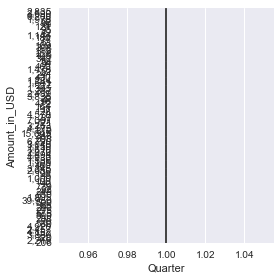

In [23]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Quarter',
    y='Amount_in_USD',
    data=test, 
    kind='box'
);

In [24]:
#Convert last column to numeric
test[['Amount_in_USD']] = test[['Amount_in_USD']].apply(pd.to_numeric, errors='coerce')

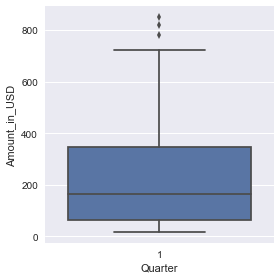

In [26]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    x='Quarter',
    y='Amount_in_USD',
    data=test, 
    kind='box'
);

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Applications/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


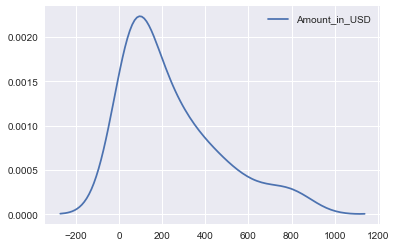

In [27]:
import seaborn as sns
sns.kdeplot(test['Amount_in_USD'])

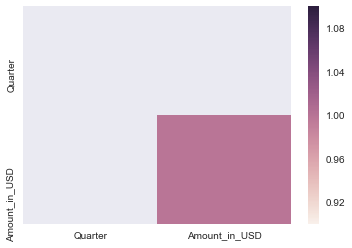

In [28]:
import seaborn as sns
corr = test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [29]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from scipy.stats import skew

In [30]:
#FillNa
test['Quarter'].fillna(0,inplace=True)
test['Supplier_Name_Level1'].fillna(0,inplace=True)
test['PR_Department'].fillna(0,inplace=True)
test['Commodity_L2'].fillna(0,inplace=True)
test['Amount_in_USD'].fillna(0,inplace=True)

In [31]:
spend=preprocessing.scale(test['Amount_in_USD'])
skness=skew(spend)

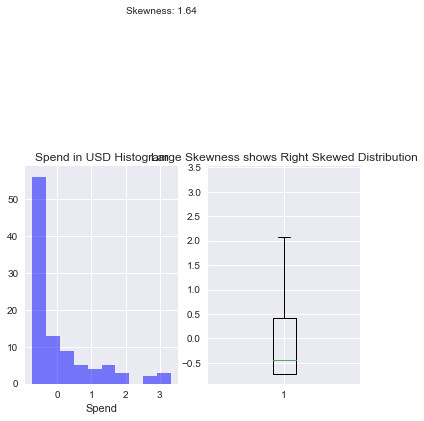

In [32]:
figure = plt.figure()
figure.add_subplot(121)   
plt.hist(spend,facecolor='blue',alpha=0.5) 
plt.xlabel("Spend") 
plt.title("Spend in USD Histogram") 
plt.text(2,100,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(spend)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()

In [35]:
test['Commodity_L2']=test['Commodity_L2'].replace(' ', '_')
test['PR_Department']=test['PR_Department'].replace(' ', '_')
test['Supplier_Name_Level1']=test['Supplier_Name_Level1'].replace(' ', '_')

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
labels=test['Amount_in_USD']
comm=[1 if values == 1 else 0 for values in test.Commodity_L2]
test['Commodity_L2']=comm
train1=test.drop(['Quarter','Amount_in_USD'],axis=1)

In [40]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1,labels, test_size = 0.10,random_state=2)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
reg.fit(x_train,y_train)

ValueError: invalid literal for float(): 056-POLICE DEPARTMENT